In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the BMI data

bmidata = pd.read_csv(r"D:\iiit notes\Internship\10-Seasion 24-May-2021\Predict_BMI_Analysis_V10.csv", header = 0)
bmidata.head()

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [3]:
bmidata.head(10)

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38
5,1.61,52.62,22.1,20.39
6,1.56,47.97,19.6,19.66
7,1.50,45.59,25.3,20.30
8,1.52,47.85,22.8,20.60
9,1.48,44.45,26.4,20.31


In [8]:
# identify the no of features or columns

len(bmidata.columns)

4

In [5]:
bmidata.columns

Index(['Height M', 'Weight kg', '%Fat', 'BMI'], dtype='object')

In [6]:
bmidata.shape

(92, 4)

In [7]:
bmidata.dtypes

Height M     float64
Weight kg    float64
%Fat         float64
BMI          float64
dtype: object

In [9]:
bmidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height M   92 non-null     float64
 1   Weight kg  92 non-null     float64
 2   %Fat       92 non-null     float64
 3   BMI        92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [10]:
bmidata.isnull().values.any()

False

In [11]:
bmidata.isnull().sum()

Height M     0
Weight kg    0
%Fat         0
BMI          0
dtype: int64

In [12]:
bmidata.tail()

,Height M,Weight kg,%Fat,BMI
87,1.49,39.01,23.3,17.52
88,1.60,41.28,20.1,16.12
89,1.42,38.10,30.3,18.83
90,1.40,30.16,20.6,15.46
91,1.45,38.56,26.0,18.39


In [13]:
bmidata.sample(5)

,Height M,Weight kg,%Fat,BMI
13,1.54,46.04,23.4,19.50
0,1.60,49.44,23.9,19.31
52,1.58,83.91,46.0,33.57
54,1.64,77.34,42.2,28.59
7,1.50,45.59,25.3,20.30


In [14]:
bmidata1 = bmidata[['Weight kg', 'BMI']]

In [15]:
bmidata1.head()

,Weight kg,BMI
0,49.44,19.31
1,62.60,22.96
2,75.75,27.79
3,48.99,20.92
4,43.09,20.38


In [19]:
x = pd.DataFrame(bmidata1['Weight kg'])
x.head()

,Weight kg
0,49.44
1,62.60
2,75.75
3,48.99
4,43.09


In [20]:
y = pd.DataFrame(bmidata['BMI'])
y.head()

,BMI
0,19.31
1,22.96
2,27.79
3,20.92
4,20.38


In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3)

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

slreg = LinearRegression()
slreg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = slreg.predict(x_test)

In [52]:
# prdicting for random data

print(slreg.predict([[56]]))

[[23.43337518]]


In [24]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred),4)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred),3))

Mean Absolute Error (MAE): 1.26
Mean Squared Error (MSE): 2.25
Root Mean Squared Error (RMSE): 1.5
Mean Absolute Percentage Error (MAPE): 6.21 %
R2_score: 0.911


In [25]:
def MAPE(y_pred, y_test):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test))*100

In [26]:
result = MAPE(y_pred,y_test)
print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

Mean Absolute Percentage Error (MAPE): 6.21 %


Text(0, 0.5, 'BMI')

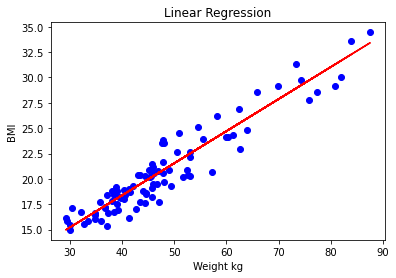

In [27]:
plt.scatter(x, y, color = 'blue')

plt.plot(x, slreg.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Weight kg')
plt.ylabel('BMI')

In [28]:
bmidata.head()

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [29]:
x1 = bmidata.iloc[:, :-1]
y1 = bmidata.iloc[:, -1]

In [30]:
print(x1.head())

   Height M  Weight kg  %Fat
0      1.60      49.44  23.9
1      1.65      62.60  28.8
2      1.65      75.75  32.4
3      1.53      48.99  25.8
4      1.45      43.09  22.5


In [31]:
print(y1.head())

0    19.31
1    22.96
2    27.79
3    20.92
4    20.38
Name: BMI, dtype: float64


In [32]:
x1.head()

,Height M,Weight kg,%Fat
0,1.60,49.44,23.9
1,1.65,62.60,28.8
2,1.65,75.75,32.4
3,1.53,48.99,25.8
4,1.45,43.09,22.5


In [33]:
y1.head()

0    19.31
1    22.96
2    27.79
3    20.92
4    20.38
Name: BMI, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3)

# Multi-Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

mulreg = LinearRegression()
mulreg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = mulreg.predict(x_test) 

In [ ]:
print(mulreg.predict([]))

In [37]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred),4)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred),3))


Mean Absolute Error (MAE): 0.34
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE): 0.49
Mean Absolute Percentage Error (MAPE): 1.4500000000000002 %
R2_score: 0.99


In [38]:
from statsmodels.api import OLS
OLS(y_test,y_pred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.945e+04
Date:                Mon, 31 May 2021   Prob (F-statistic):                    1.13e-46
Time:                        23:32:26   Log-Likelihood:                         -18.606
No. Observations:                  28   AIC:                                      39.21
Df Residuals:                      27   BIC:                                      40.54
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9937      0.004    243.831      0.000       0.985       1.002
==============================================================================
Omnibus:                        8.220   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.434
Skew:                          -1.083   Prob(JB):                       0.0401
Kurtosis:                       3.907   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
r_squared = round(metrics.r2_score(y_test, y_pred), 3)

In [41]:
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),3)

In [42]:
print(r_squared, adjusted_r_squared)

0.99 0.99


In [43]:
print(mulreg.intercept_)

36.25389715641289


In [44]:
print(mulreg.coef_)

[-2.33644054e+01  4.03146064e-01  1.85217893e-02]


In [45]:
from sklearn.metrics import r2_score
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.990


In [46]:
# write dataframe data to .csv file
y_pred = pd.DataFrame(y_pred) # convert array into dataframe
#
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')
y_pred.to_csv('y_pred.csv')


In [48]:
print(y_pred)

            0
0   22.529313
1   16.786868
2   34.018125
3   17.829566
4   20.055319
5   29.897208
6   20.694355
7   26.586197
8   16.583913
9   18.273627
10  17.310922
11  23.472999
12  18.997517
13  27.919744
14  20.260082
15  24.400345
16  18.821152
17  15.507703
18  17.467006
19  17.880488
20  28.841049
21  31.421506
22  15.122558
23  20.083395
24  21.189718
25  24.607044
26  16.605740
27  22.480103


In [49]:
x_test["Pred_value"]=mulreg.predict(x_test)
# y_pred = mulreg.predict(x_test)

<ipython-input-49-33ace38ef666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Pred_value"]=mulreg.predict(x_test)


In [50]:
x_test.head()


,Height M,Weight kg,%Fat,Pred_value
64,1.53,52.96,36.3,22.529313
38,1.45,34.81,20.4,16.786868
52,1.58,83.91,46.0,34.018125
30,1.46,38.10,17.7,17.829566
7,1.50,45.59,25.3,20.055319


In [51]:
bmidata.head()

,Height M,Weight kg,%Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38
